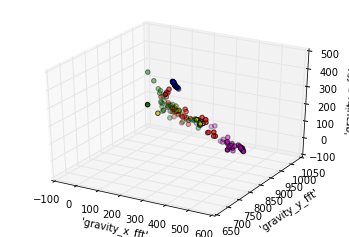

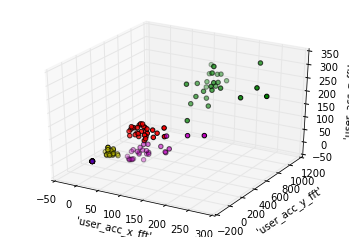

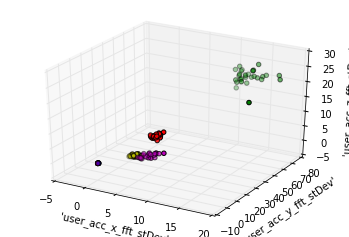

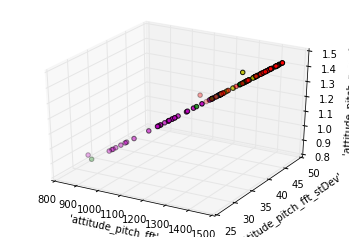

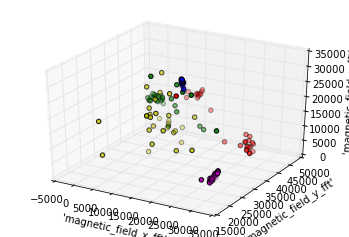

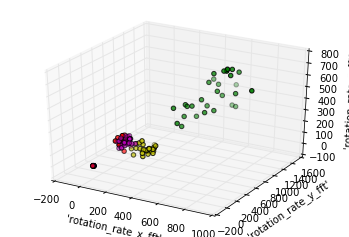

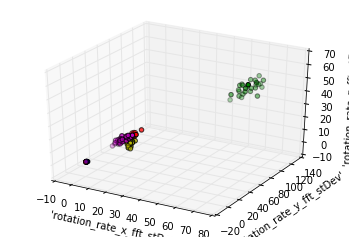

In [1]:
%matplotlib inline

import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

from itertools import cycle
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree

action_list = ['walking', 'sitting', 'running', 'stairs', 'biking']

def plot_features(feature_list):
	X, y = create_sets(action_list)
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	x_walking = []
	y_walking = []
	z_walking = []

	x_sitting = []
	y_sitting = []
	z_sitting = []

	x_running = []
	y_running = []
	z_running = []

	x_stairs = []
	y_stairs = []
	z_stairs = []

	x_biking = []
	y_biking = []
	z_biking = []

	for i in range (0, 145):
		if i < 30:
			x_walking.append(X[i][0])
			y_walking.append(X[i][1])
			z_walking.append(X[i][2])
		elif i < 58:
			x_sitting.append(X[i][0])
			y_sitting.append(X[i][1])
			z_sitting.append(X[i][2])
		elif i < 87:
			x_running.append(X[i][0])
			y_running.append(X[i][1])
			z_running.append(X[i][2])
		elif i < 116:
			x_stairs.append(X[i][0])
			y_stairs.append(X[i][1])
			z_stairs.append(X[i][2])
		else:
			x_biking.append(X[i][0])
			y_biking.append(X[i][1])
			z_biking.append(X[i][2])

	ax.scatter(x_walking, y_walking, z_walking, c='r', marker='o')
	ax.scatter(x_sitting, y_sitting, z_sitting, c='b', marker='o')
	ax.scatter(x_running, y_running, z_running, c='g', marker='o')
	ax.scatter(x_stairs, y_stairs, z_stairs, c='y', marker='o')
	ax.scatter(x_biking, y_biking, z_biking, c='m', marker='o')


	ax.set_xlabel(feature_list[0])
	ax.set_ylabel(feature_list[1])
	ax.set_zlabel(feature_list[2])

	plt.show()
    
def create_sets(type_list):  
	X = []
	y = []
	for index, action in enumerate(action_list): 
		for num in range(0,29):
			features = get_features('data/'+ action + '.csv', num)
			X.append(features)
			y.append(index)
	return X, np.array(y)


def get_features(input_csv, num):
	file = open (input_csv, 'r')
	reader = csv.DictReader(file)
	features = []
	for row, line in enumerate(reader):
		if row == num:
			for key in feature_list:
				features.append(float(line[key]))
	return features
    

feature_list = ["'gravity_x_fft'", "'gravity_y_fft'", "'gravity_z_fft'"]
plot_features(feature_list)
print "\n"

feature_list = ["'user_acc_x_fft'", "'user_acc_y_fft'","'user_acc_z_fft'"]
plot_features(feature_list)
print "\n"

feature_list = ["'user_acc_x_fft_stDev'", "'user_acc_y_fft_stDev'","'user_acc_z_fft_stDev'"]
plot_features(feature_list)
print "\n"

feature_list = ["'attitude_pitch_fft'", "'attitude_pitch_fft_stDev'", "'attitude_pitch_mean'"]
plot_features(feature_list)
print "\n"

feature_list = ["'magnetic_field_x_fft'", "'magnetic_field_y_fft'", "'magnetic_field_z_fft'"]
plot_features(feature_list)
print "\n"

feature_list = ["'rotation_rate_x_fft'", "'rotation_rate_y_fft'", "'rotation_rate_z_fft'"]
plot_features(feature_list)
print "\n"

feature_list = ["'rotation_rate_x_fft_stDev'", "'rotation_rate_y_fft_stDev'", "'rotation_rate_z_fft_stDev'"]
plot_features(feature_list)
print "\n"

Gravity FFT Max
----------------------
svm accuray: 0.793103448276 


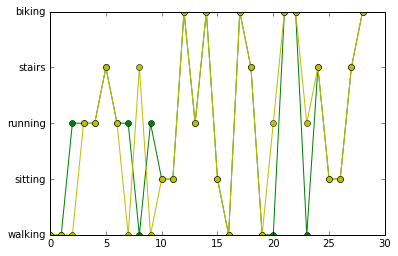

decision tree: 0.862068965517 


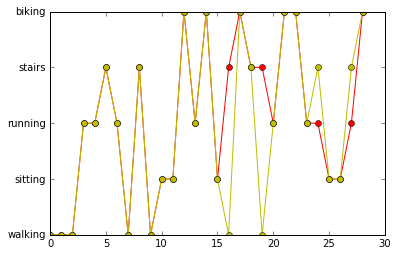

logistic regression: 0.689655172414 


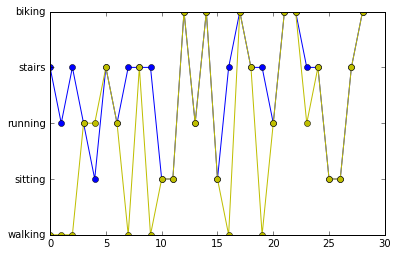

In [2]:
action_list = ['walking', 'sitting', 'running', 'stairs', 'biking']

def get_score(X, y):
    clf_svm = svm.SVC(gamma=0.001, C=100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    svm_classifier = clf_svm.fit(X_train, y_train)
    y_pred_svm = svm_classifier.predict(X_test)
    a = np.array(y_pred_svm)
    b = np.array(y_test)
    error = np.mean( a != b )
    print 'svm accuray: {} '.format(1-error)
    fig, ax = plt.subplots()
    fig.canvas.draw()
    plt.yticks(np.arange(0.0, 5.0, 1.0))
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels = ['walking', 'sitting', 'running', 'stairs', 'biking']
    ax.set_yticklabels(labels)
    plt.plot(y_pred_svm, c='g', marker='o')
    plt.plot(y_test, c='y', marker='o')
    plt.show()

    clf_tree = tree.DecisionTreeClassifier()
    tree_classifier = clf_tree.fit(X_train, y_train)
    y_pred_tree = tree_classifier.predict(X_test)
    a = np.array(y_pred_tree)
    error = np.mean( a != b )
    print 'decision tree: {} '.format(1-error)
    fig, ax = plt.subplots()
    fig.canvas.draw()
    plt.yticks(np.arange(0.0, 5.0, 1.0))
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels = ['walking', 'sitting', 'running', 'stairs', 'biking']
    ax.set_yticklabels(labels)
    plt.plot(y_pred_tree, c='r', marker='o')
    plt.plot(y_test, c='y', marker='o')
    plt.show()

    clf_log = LogisticRegression()
    log_classifier = clf_log.fit(X_train, y_train)
    y_pred_log = log_classifier.predict(X_test)
    a = np.array(y_pred_log)
    error = np.mean( a != b )
    print 'logistic regression: {} '.format(1-error)
    fig, ax = plt.subplots()
    fig.canvas.draw()
    plt.yticks(np.arange(0.0, 5.0, 1.0))
    labels = [item.get_text() for item in ax.get_yticklabels()]
    labels = ['walking', 'sitting', 'running', 'stairs', 'biking']
    ax.set_yticklabels(labels)
    plt.plot(y_pred_log, c='b', marker='o')
    plt.plot(y_test, c='y', marker='o')
    plt.show()
    
feature_list = ["'gravity_x_fft'", "'gravity_y_fft'", "'gravity_z_fft'"]
X, y = create_sets(action_list)
print "Gravity FFT Max"
print "----------------------"
get_score(X, y)
print "\n"



User Acceleration FFT Max
----------------------
svm accuray: 0.965517241379 


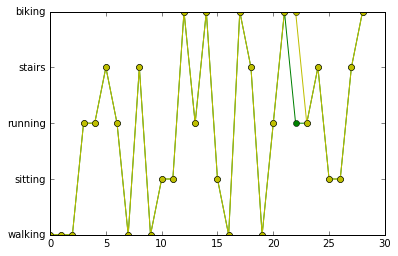

decision tree: 1.0 


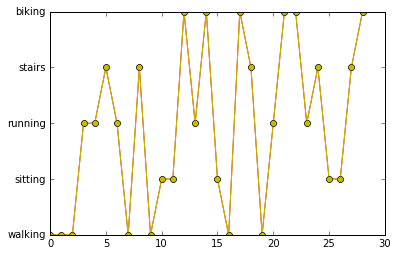

logistic regression: 0.965517241379 


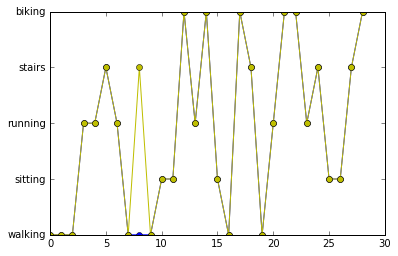



User Acceleration FFT St Dev
----------------------
svm accuray: 1.0 


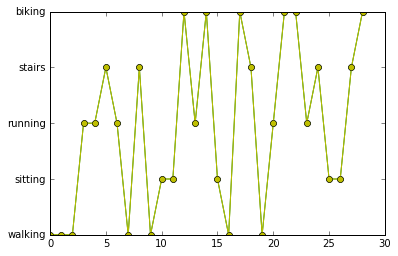

decision tree: 0.965517241379 


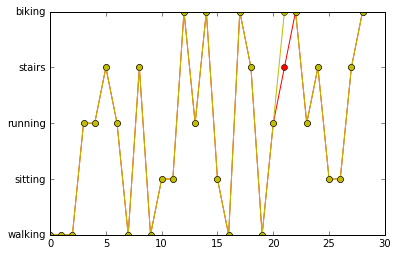

logistic regression: 1.0 


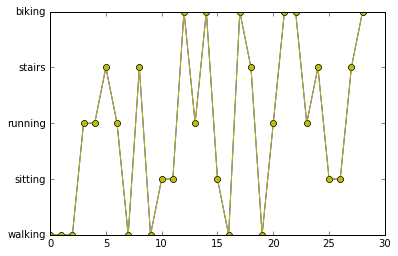

In [3]:
feature_list = ["'user_acc_x_fft'", "'user_acc_y_fft'","'user_acc_z_fft'"]
X, y = create_sets(action_list)
print "User Acceleration FFT Max"
print "----------------------"
get_score(X, y)
print "\n"

feature_list = ["'user_acc_x_fft_stDev'", "'user_acc_y_fft_stDev'","'user_acc_z_fft_stDev'"]
X, y = create_sets(action_list)
print "User Acceleration FFT St Dev"
print "----------------------"
get_score(X, y)
print "\n"

Attitude Pitch FFT, Attitude Pitch FFT St Dev, Attitude Pitch Mean
----------------------
svm accuray: 0.586206896552 


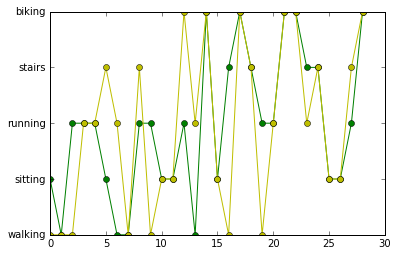

decision tree: 0.620689655172 


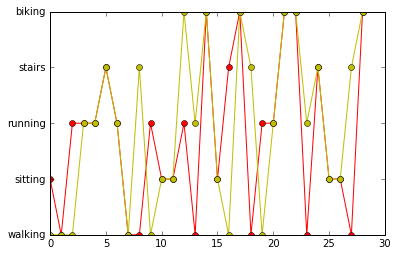

logistic regression: 0.310344827586 


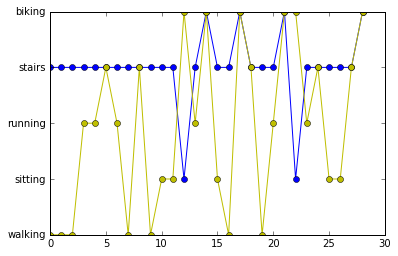



Magnetic Field FFT
----------------------
svm accuray: 0.172413793103 


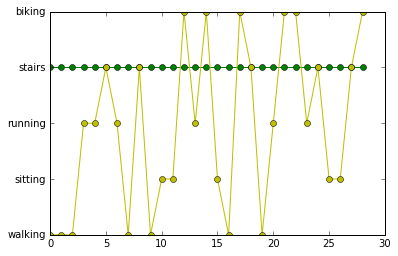

decision tree: 0.931034482759 


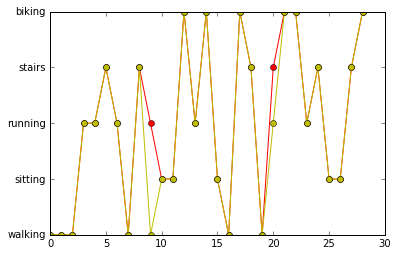

logistic regression: 0.793103448276 


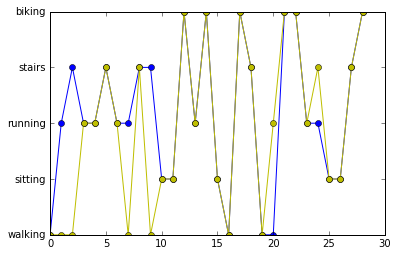

In [4]:
feature_list = ["'attitude_pitch_fft'", "'attitude_pitch_fft_stDev'", "'attitude_pitch_mean'"]
X, y = create_sets(action_list)
print "Attitude Pitch FFT, Attitude Pitch FFT St Dev, Attitude Pitch Mean"
print "----------------------"
get_score(X, y)
print "\n"

feature_list = ["'magnetic_field_x_fft'", "'magnetic_field_y_fft'", "'magnetic_field_z_fft'"]
X, y = create_sets(action_list)
print "Magnetic Field FFT"
print "----------------------"
get_score(X, y)
print "\n"

Rotation Rate FFT
----------------------
svm accuray: 0.827586206897 


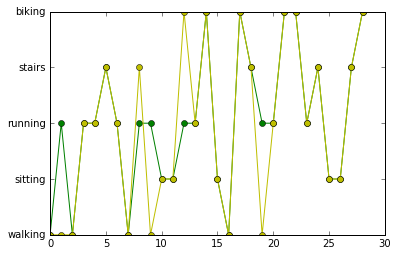

decision tree: 0.965517241379 


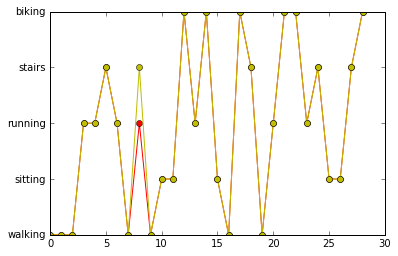

logistic regression: 0.862068965517 


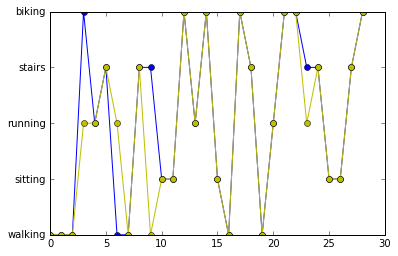



Rotation Rate FFT StDev
----------------------
svm accuray: 1.0 


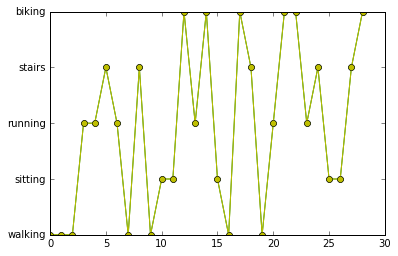

decision tree: 0.965517241379 


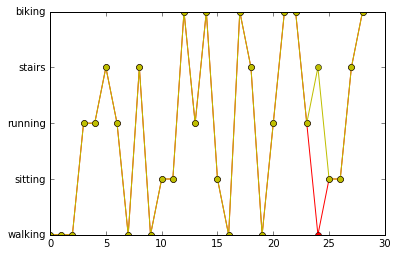

logistic regression: 0.896551724138 


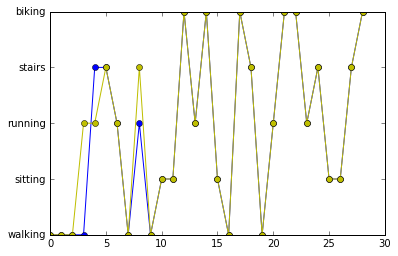

In [5]:
feature_list = ["'rotation_rate_x_fft'", "'rotation_rate_y_fft'", "'rotation_rate_z_fft'"]
X, y = create_sets(action_list)
print "Rotation Rate FFT"
print "----------------------"
get_score(X, y)
print "\n"

feature_list = ["'rotation_rate_x_fft_stDev'", "'rotation_rate_y_fft_stDev'", "'rotation_rate_z_fft_stDev'"]
X, y = create_sets(action_list)
print "Rotation Rate FFT StDev"
print "----------------------"
get_score(X, y)
print "\n"

Summary:

I had a total of 75 features calculated. For each original category (attitude_roll, attitude_pitch, rotation_rate_x, etc...), I calculated 4 so 15 x 4 = 60.
	- mean
	- standard deviation
	- fast fourier transform maximum
	- fast fourier transform standard deviation

From there, I tested a lot of combination of 3 features and plotted them to see if there was a "distinct" mapping between the different categories.
	- The ones that had the best distinct groupings were user acceleration, user acceleration standard deviation, rotation rate, rotation rate standard deviation

Corresponding accuracy with classifiers:

Gravity FFT Max
----------------------
svm accuray: 0.793103448276 
decision tree: 0.827586206897 
logistic regression: 0.689655172414 

Best classifiers: DT, SVM, LR

User Acceleration FFT Max
----------------------
svm accuray: 0.965517241379 
decision tree: 1.0 
logistic regression: 0.965517241379 

Best classifiers: DT, SVM and LR equal

User Acceleration FFT St Dev
----------------------
svm accuray: 1.0 
decision tree: 0.965517241379 
logistic regression: 1.0

Best classifiers: SVM and LR equal, DT

Attitude Pitch FFT, Attitude Pitch FFT St Dev, Attitude Pitch Mean
----------------------
svm accuray: 0.586206896552 
decision tree: 0.586206896552 
logistic regression: 0.310344827586

Best classifiers: DT and SVM equal, LR

Magnetic Field FFT
----------------------
svm accuray: 0.172413793103 
decision tree: 0.931034482759 
logistic regression: 0.793103448276 

Best classifiers: DT, LR, SVM

Rotation Rate FFT
----------------------
svm accuray: 0.827586206897 
decision tree: 1.0 
logistic regression: 0.862068965517 

Best classifiers: DT, LR, SVM

Rotation Rate FFT StDev
----------------------
svm accuray: 1.0 
decision tree: 1.0 
logistic regression: 0.896551724138 

Best classifiers: DT and SVM, LR

*CONCLUSIONS

User Acceleration FFT St Dev
----------------------
svm accuray: 1.0 
decision tree: 0.965517241379 
logistic regression: 1.0

Best classifiers: DT, SVM, LR

Most errors:
- walking vs. running
- running vs. stairs